ЗАДАНИЕ №1
Эксперимент  1: Число заявок =  10
Эксперимент  2: Число заявок =   8
Эксперимент  3: Число заявок =  13
Эксперимент  4: Число заявок =   7
Эксперимент  5: Число заявок =  11
Эксперимент  6: Число заявок =  11
Эксперимент  7: Число заявок =   9
Эксперимент  8: Число заявок =  16
Эксперимент  9: Число заявок =  11
Эксперимент 10: Число заявок =   9

----------------------------------------
Среднее число заявок (эксперимент): 10.50
Среднее число заявок (теория):      10.00
Среднее время между заявками (эксперимент): 8.8139 мс
Среднее время между заявками (теория):      10.0 мс
Среднеквадратическое отклонение числа заявок: 2.46

ЗАДАНИЕ №2

Моделирование N = 1000
  Среднее значение (эксперимент): 0.684261
  Среднее значение (теория):      0.666667
  Отклонение: 2.6391%

Моделирование N = 10000
  Среднее значение (эксперимент): 0.676074
  Среднее значение (теория):      0.666667
  Отклонение: 1.4112%

Моделирование N = 100000
  Среднее значение (эксперимент): 0.667209
  Среднее 

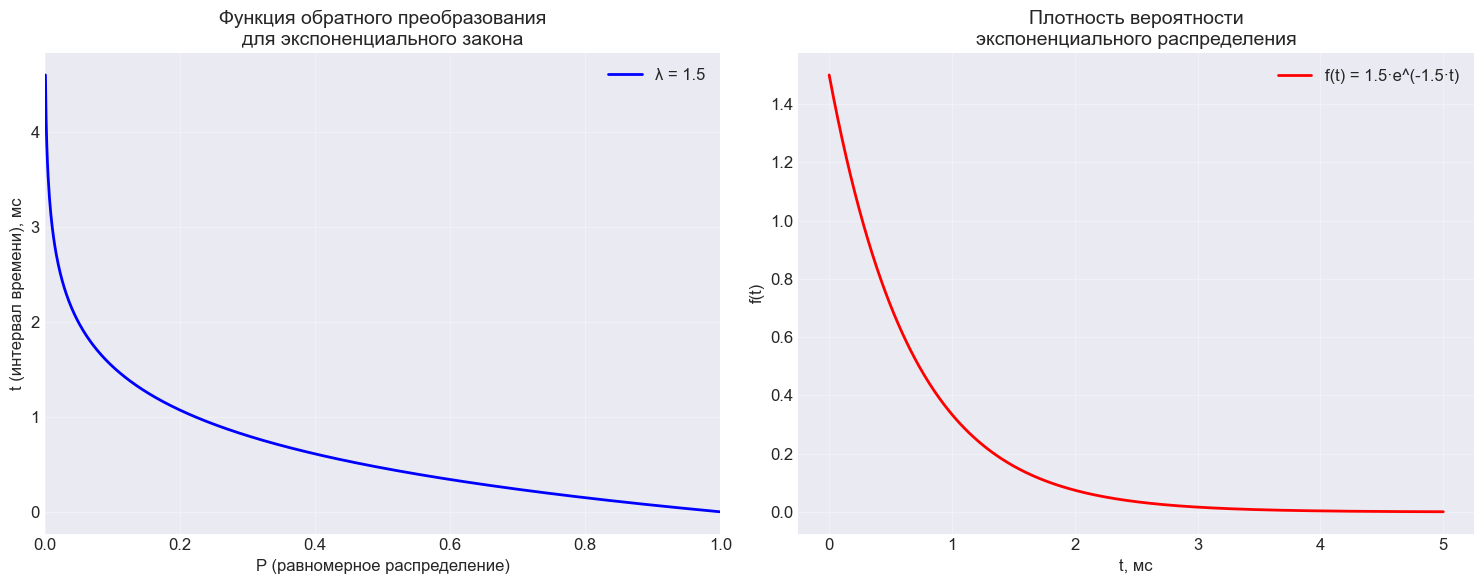

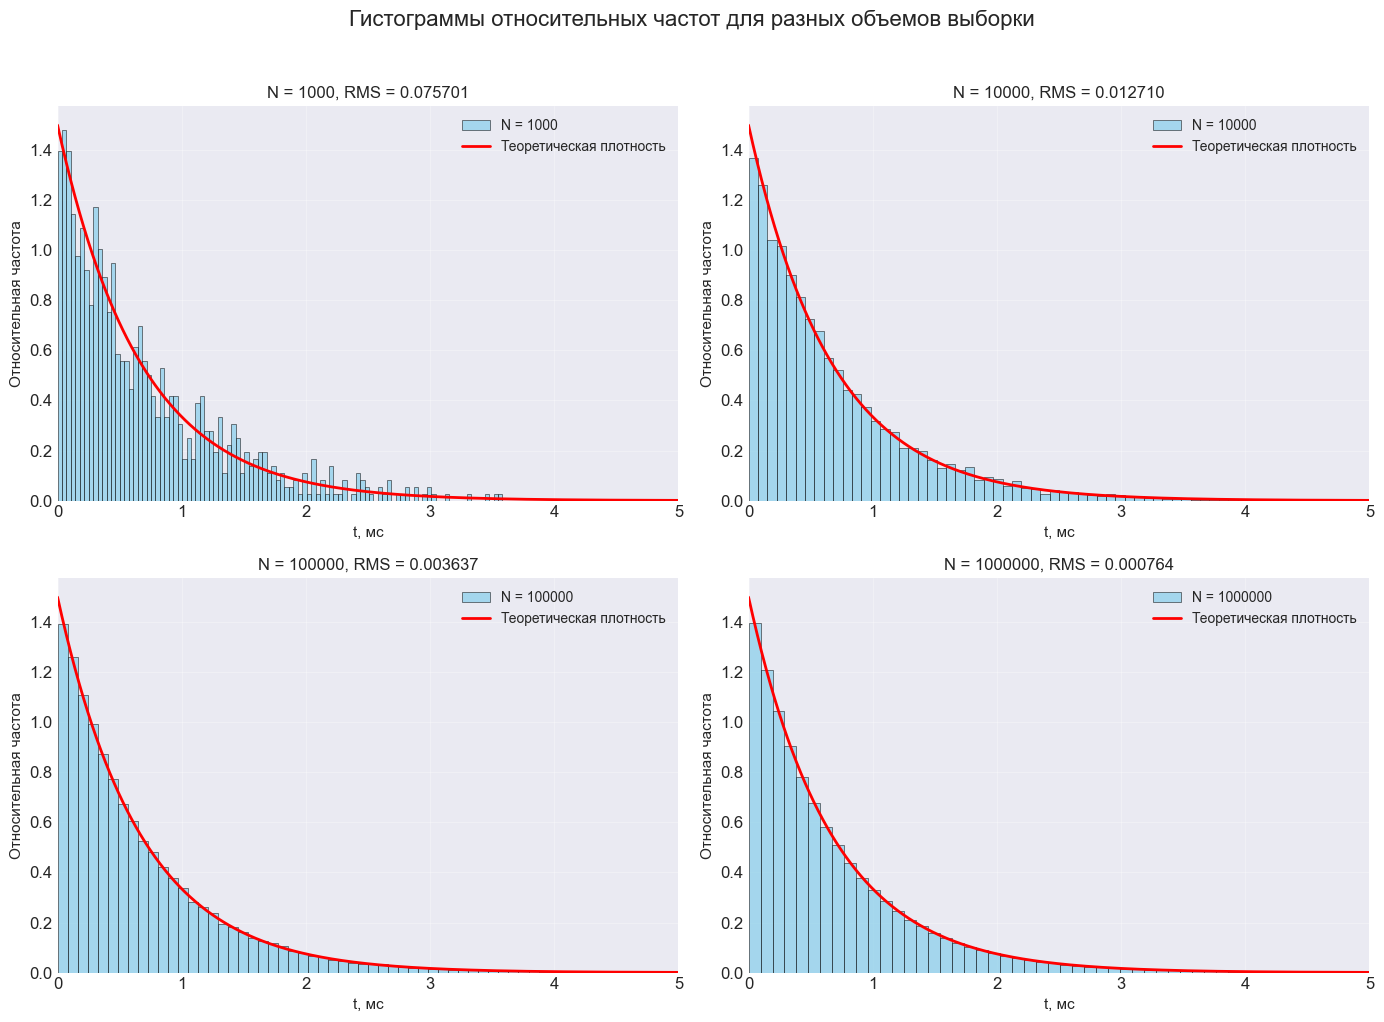

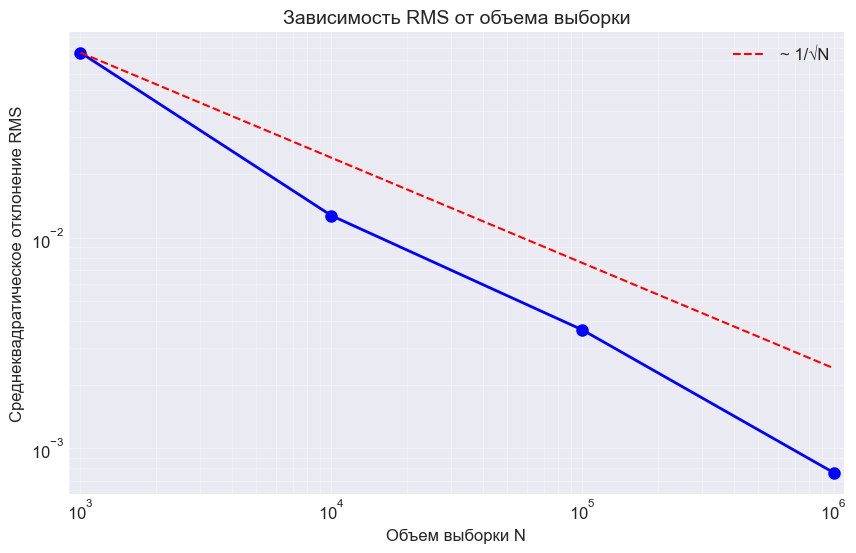


ВЫПОЛНЕНИЕ ЗАДАНИЙ ЗАВЕРШЕНО


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Константы для красивого оформления графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Функция для генерации времени прихода заявок по формуле (8)
def generate_arrival_times(lambda_param, T_k, random_seed=None):
    """
    Генерирует времена прихода заявок для пуассоновского потока

    Parameters:
    -----------
    lambda_param : float - интенсивность потока (заявок/мс)
    T_k : float - временной интервал моделирования (мс)
    random_seed : int - seed для воспроизводимости результатов

    Returns:
    --------
    arrival_times : list - времена прихода заявок
    num_requests : int - число поступивших заявок
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    arrival_times = []
    current_time = 0

    while current_time < T_k:
        # Генерация случайного числа P ~ Uniform(0,1)
        P = np.random.random()
        # Формула (8): t = -1/lambda * ln(P)
        interval = -1/lambda_param * np.log(P)
        current_time += interval
        if current_time < T_k:
            arrival_times.append(current_time)

    return arrival_times, len(arrival_times)

# Задание №1
def task1():
    """
    Моделирование процесса поступления заявок (10 экспериментов)
    """
    print("="*60)
    print("ЗАДАНИЕ №1")
    print("="*60)

    lambda_param = 0.1  # заявок/мс
    T_k = 100  # мс
    num_experiments = 10

    all_num_requests = []
    all_intervals = []

    for exp in range(num_experiments):
        arrival_times, num_requests = generate_arrival_times(
            lambda_param, T_k, random_seed=exp+42
        )
        all_num_requests.append(num_requests)

        # Вычисляем интервалы между заявками
        intervals = np.diff([0] + arrival_times)
        all_intervals.extend(intervals)

        print(f"Эксперимент {exp+1:2d}: Число заявок = {num_requests:3d}")

    # Статистика
    avg_num_requests = np.mean(all_num_requests)
    avg_interval = np.mean(all_intervals)
    theoretical_avg_interval = 1/lambda_param
    theoretical_avg_requests = lambda_param * T_k

    print("\n" + "-"*40)
    print(f"Среднее число заявок (эксперимент): {avg_num_requests:.2f}")
    print(f"Среднее число заявок (теория):      {theoretical_avg_requests:.2f}")
    print(f"Среднее время между заявками (эксперимент): {avg_interval:.4f} мс")
    print(f"Среднее время между заявками (теория):      {theoretical_avg_interval:.1f} мс")
    print(f"Среднеквадратическое отклонение числа заявок: {np.std(all_num_requests):.2f}")

    return all_num_requests, all_intervals

# Задание №2
def inverse_transform_sampling(lambda_param, N, random_seed=None):
    """
    Метод обратного преобразования для экспоненциального закона

    Parameters:
    -----------
    lambda_param : float - параметр экспоненциального распределения
    N : int - количество экспериментов
    random_seed : int - seed для воспроизводимости

    Returns:
    --------
    samples : ndarray - выборка из экспоненциального распределения
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # Генерация равномерно распределенных случайных чисел
    P = np.random.random(N)

    # Формула (8): t = -1/lambda * ln(P)
    samples = -1/lambda_param * np.log(P)

    return samples

def task2():
    """
    Моделирование экспоненциального закона методом обратной функции
    """
    print("\n" + "="*60)
    print("ЗАДАНИЕ №2")
    print("="*60)

    lambda_param = 1.5  # 1/мс
    N_values = [10**3, 10**4, 10**5, 10**6]

    samples_dict = {}

    for N in N_values:
        print(f"\nМоделирование N = {N}")
        samples = inverse_transform_sampling(lambda_param, N, random_seed=42)
        samples_dict[N] = samples

        # Статистика
        mean_exp = np.mean(samples)
        std_exp = np.std(samples)
        theoretical_mean = 1/lambda_param
        theoretical_std = 1/lambda_param

        print(f"  Среднее значение (эксперимент): {mean_exp:.6f}")
        print(f"  Среднее значение (теория):      {theoretical_mean:.6f}")
        print(f"  Отклонение: {abs(mean_exp - theoretical_mean)/theoretical_mean*100:.4f}%")

    return samples_dict, lambda_param, N_values

# Задание №3 - Функции для построения графиков
def plot_inverse_function(lambda_param):
    """
    Построение графика функции обратного преобразования
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # График обратной функции
    p_values = np.linspace(0.001, 0.999, 1000)
    t_values = -1/lambda_param * np.log(p_values)

    ax1 = axes[0]
    ax1.plot(p_values, t_values, 'b-', linewidth=2, label=f'λ = {lambda_param}')
    ax1.set_xlabel('P (равномерное распределение)', fontsize=12)
    ax1.set_ylabel('t (интервал времени), мс', fontsize=12)
    ax1.set_title('Функция обратного преобразования\nдля экспоненциального закона', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xlim(0, 1)

    # Теоретическая плотность экспоненциального распределения
    x = np.linspace(0, 5, 1000)
    y = lambda_param * np.exp(-lambda_param * x)

    ax2 = axes[1]
    ax2.plot(x, y, 'r-', linewidth=2, label=f'f(t) = {lambda_param}·e^(-{lambda_param}·t)')
    ax2.set_xlabel('t, мс', fontsize=12)
    ax2.set_ylabel('f(t)', fontsize=12)
    ax2.set_title('Плотность вероятности\nэкспоненциального распределения', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    return fig

def plot_histograms(samples_dict, lambda_param, N_values):
    """
    Построение гистограмм для разных объемов выборки
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    # Теоретическая плотность для сравнения
    x_theor = np.linspace(0, 5, 1000)
    y_theor = lambda_param * np.exp(-lambda_param * x_theor)

    rms_errors = []

    for idx, (N, samples) in enumerate(samples_dict.items()):
        ax = axes[idx]

        # Построение гистограммы относительных частот
        n, bins, patches = ax.hist(samples, bins=100, density=True,
                                   alpha=0.7, color='skyblue',
                                   edgecolor='black', linewidth=0.5,
                                   label=f'N = {N}')

        # Теоретическая кривая
        ax.plot(x_theor, y_theor, 'r-', linewidth=2,
                label='Теоретическая плотность')

        # Вычисление среднеквадратического отклонения
        bin_centers = (bins[:-1] + bins[1:]) / 2
        theoretical_values = lambda_param * np.exp(-lambda_param * bin_centers)
        rms_error = np.sqrt(np.mean((n - theoretical_values)**2))
        rms_errors.append(rms_error)

        ax.set_xlabel('t, мс', fontsize=11)
        ax.set_ylabel('Относительная частота', fontsize=11)
        ax.set_title(f'N = {N}, RMS = {rms_error:.6f}', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        ax.set_xlim(0, 5)

    plt.suptitle('Гистограммы относительных частот для разных объемов выборки',
                 fontsize=16, y=1.02)
    plt.tight_layout()

    # Дополнительный график зависимости RMS от N
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.loglog(N_values, rms_errors, 'bo-', linewidth=2, markersize=8)
    ax2.set_xlabel('Объем выборки N', fontsize=12)
    ax2.set_ylabel('Среднеквадратическое отклонение RMS', fontsize=12)
    ax2.set_title('Зависимость RMS от объема выборки', fontsize=14)
    ax2.grid(True, alpha=0.3, which='both')
    ax2.set_xlim(min(N_values)*0.9, max(N_values)*1.1)

    # Аппроксимация зависимости RMS ~ 1/sqrt(N)
    N_array = np.array(N_values)
    fit_line = rms_errors[0] * np.sqrt(N_values[0]/N_array)
    ax2.loglog(N_values, fit_line, 'r--', linewidth=1.5,
               label='~ 1/√N')
    ax2.legend()

    return fig, fig2, rms_errors

def main():
    """
    Основная функция выполнения всех заданий
    """
    # Задание 1
    num_requests, intervals = task1()

    # Задание 2
    samples_dict, lambda_param, N_values = task2()

    # Задание 3 - Визуализация
    print("\n" + "="*60)
    print("ЗАДАНИЕ №3")
    print("="*60)

    # График обратной функции
    fig1 = plot_inverse_function(lambda_param)

    # Гистограммы
    fig2, fig3, rms_errors = plot_histograms(samples_dict, lambda_param, N_values)

    print("\nСреднеквадратические отклонения от теоретической плотности:")
    for N, rms in zip(N_values, rms_errors):
        print(f"  N = {N:6d}: RMS = {rms:.6f}")

    # Показываем все графики
    plt.show()

    print("\n" + "="*60)
    print("ВЫПОЛНЕНИЕ ЗАДАНИЙ ЗАВЕРШЕНО")
    print("="*60)

main()